# Customer churn: weather he will go or not?

In [33]:
import pandas as pd
import numpy as np

In [34]:
# read data
churn_df = pd.read_csv('data/churn.csv')

In [35]:
churn_df.head

<bound method NDFrame.head of      State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0       KS             128        415  382-4657         no        yes   
1       OH             107        415  371-7191         no        yes   
2       NJ             137        415  358-1921         no         no   
3       OH              84        408  375-9999        yes         no   
4       OK              75        415  330-6626        yes         no   
5       AL             118        510  391-8027        yes         no   
6       MA             121        510  355-9993         no        yes   
7       MO             147        415  329-9001        yes         no   
8       LA             117        408  335-4719         no         no   
9       WV             141        415  330-8173        yes        yes   
10      IN              65        415  329-6603         no         no   
11      RI              74        415  344-9403         no         no   
12      IA           

In [36]:
col_names = churn_df.columns
print('Coulmn Names are : ')
print(col_names)
print('number of column are ', len(col_names))

Coulmn Names are : 
Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')
number of column are  21


In [37]:
print('Dimensions of data are : ', churn_df.shape)

Dimensions of data are :  (3333, 21)


Till now we got data dimensions

Nows lets work on feature engineering

In [38]:
churn_df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [39]:
# Check null
churn_df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [40]:
# Describe Contineous data
churn_df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [41]:
# Describe Cat variables

churn_df.describe(include=['object'])

,State,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,417-1272,no,no,False.
freq,106,1,3010,2411,2850


In [42]:
#Create set of dependent and independent variables

churn_result = churn_df['Churn?']
y = churn_df['Churn?'].map({'True.':1, 'False.': 0})

#Another way of changing data
#y = np.where(churn_result == "True.", 1, 0)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn?, dtype: int64

In [43]:
churn_df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [44]:
# Decide to drop columns

to_drop = ['State', 'Area Code', 'Phone', 'Churn?']
churn_feat_space = churn_df.drop(to_drop, axis =1)
churn_feat_space.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [45]:
churn_feat_space.describe(include=['object'])

,Int'l Plan,VMail Plan
count,3333,3333
unique,2,2
top,no,no
freq,3010,2411


In [51]:
# convert other cat var to numbers 
# conver yes and no to 1 and 0
yes_no_columns = ['Int\'l Plan', 'VMail Plan']
churn_feat_space[yes_no_columns] = (churn_feat_space[yes_no_columns] == 'yes').astype('int')

TypeError: Could not compare ['yes'] with block values

In [52]:
churn_feat_space[yes_no_columns].dtypes

Int'l Plan    int32
VMail Plan    int32
dtype: object

In [47]:
features = churn_feat_space.columns
features

In [53]:
X = churn_feat_space.as_matrix().astype(np.float)

In [54]:
churn_feat_space.describe()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,0.295876,0.447403,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
?StandardScaler

# If at all you have infinite numbers in your data

Then just find range of your data and take largest number and multiply by 100 and replace inf by that new number

In [78]:
print("Feature space has %d observations and %d features"% (X.shape[0], X.shape[1]))

Feature space has 3333 observations and 17 features


In [79]:
print('Unique target labels : ', np.unique(y))

Unique target labels :  [0 1]


In [80]:
# function for cross validation
from sklearn.cross_validation import KFold

# function for cross-validation
from sklearn.cross_validation import KFold
def run_cv(X,y,clf_class,**kwargs):
    # construct a k fold object
    kf = KFold(len(y),n_folds = 5, shuffle=True)
    y_pred = y.copy()
    for train_index,test_index in kf:
        X_train, X_test = X[train_index],X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        # Intialize a classifier with its arguments
        clf=clf_class(**kwargs)
        # model fit
        clf.fit(X_train,y_train)
        # model prediction
        y_pred[test_index]=clf.predict(X_test)
    return y_pred        

from sklearn.model_selection import KFold

In [81]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.neighbors import KNeighborsClassifier as KNN


In [82]:
from sklearn import metrics 

In [85]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [86]:
print('Support Vector Machine: ')
print("%f"% accuracy(y, run_cv(X, y, SVC)))

Support Vector Machine: 
0.921692


In [88]:
print("Random Forest:")
print("%f"% accuracy(y,run_cv(X,y,RandomForest)))

Random Forest:
0.939394


In [89]:
print("K Nearest Neighbor:")
print("%f"% accuracy(y,run_cv(X,y,KNN)))

K Nearest Neighbor:
0.891689


Precision and Recall

In [90]:
from sklearn.metrics import confusion_matrix

In [103]:
# Create a confusion matrix
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
("Support vector Machines",confusion_matrix(y,run_cv(X,y,SVC))),
("Random Forest",confusion_matrix(y,run_cv(X,y,RandomForest))),
("K nearest neighbors",confusion_matrix(y,run_cv(X,y,KNN)))]

In [110]:
confusion_matrices

[('Support vector Machines', array([[2820,   30],
         [ 236,  247]])), ('Random Forest', array([[2819,   31],
         [ 146,  337]])), ('K nearest neighbors', array([[2807,   43],
         [ 315,  168]]))]

In [115]:
confusion_matrices[0][1]

array([[2820,   30],
       [ 236,  247]])

In [104]:
from matplotlib import pyplot as plt
%matplotlib inline

In [130]:
#Create plotting

def draw_confusion_matrix(confusion_matrices,class_names):
    fig = plt.figure()
    

    dd = [131, 132, 133]
    for i in range(3):
        ax =  fig.add_subplot(dd[i])
        ax.matshow(confusion_matrices[i][1])
        ax.set_title(confusion_matrices[i][0])
        ax.set_xlabel('Prediction')
        ax.set_ylabel('True')
#        plt.show

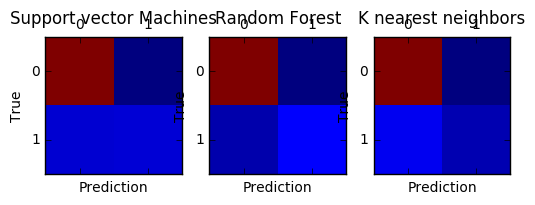

In [131]:
draw_confusion_matrix(confusion_matrices, class_names)

### Think Probabilities

In [133]:

# function for cross-validation
from sklearn.cross_validation import KFold
def run_cv(X, y, clf_class, **kwargs):
    # construct a k fold object
    kf = KFold(len(y),n_folds = 5, shuffle=True)
    y_pred = y.copy()
    for train_index,test_index in kf:
        X_train, X_test = X[train_index],X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        # Intialize a classifier with its arguments
        clf= clf_class(**kwargs)
        # model fit
        clf.fit(X_train,y_train)
        # model prediction
        y_pred[test_index]=clf.predict_proba(X_test)
    return y_pred        

In [138]:
pred_prob = run_cv(X, y, RandomForest, n_estimators =10)

pred_churn = pred_prob[:]
is_churn = (y == 1)

#Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: assignment will raise an error in the future, most lik

In [139]:
pred_prob

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [140]:
#Calculate true probabilities
true_prob = {}

for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
    true_prob = pd. Series(true_prob)

In [141]:
counts = pd.concat([counts, true_prob], axis =1).reset_index()

In [146]:
counts

,index,0,1
0,0,2376,0.148148
1,1,957,0.136886
